## Get recording

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autoreload
%autoreload 2

In [17]:
from Cfg import Cfg
from RecordingCorpus import RecordingCorpus
from multiprocessing import Pool
import warnings
warnings.filterwarnings("ignore")
import librosa
import librosa.display
import numpy as np

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

In [40]:
C = Cfg('NIST', 16000, 'amharic', 'build') 

In [41]:
if __name__ == '__main__':
    with Pool(16) as pool:
        recordings = RecordingCorpus(C, pool)

100%|██████████| 122/122 [00:14<00:00,  8.63it/s]


In [52]:
a=recordings.artifacts[0]

In [101]:
transcript=[x[3:] for x in a.target.value if float(x[4]) <= 60]
speech=[(int(float(x)*C.sample_rate), int(float(y)*C.sample_rate), z) for x,y,z in [w for w in transcript if len(w)==3]]
silence=[(int(float(x)*C.sample_rate), int(float(y)*C.sample_rate)) for x,y in [w for w in transcript if len(w)==2]]

In [ ]:
audio=a.source.value[0:16*C.sample_rate]

In [117]:
audio=a.source.value

In [ ]:
from collect_false import collect_false

In [137]:
T=np.arange(audio.shape[0])/C.sample_rate
S = librosa.feature.melspectrogram(y=audio, sr=C.sample_rate, n_mels=64, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
s_dB_mean=np.mean(S_dB,axis=0)
speech_q=(s_dB_mean>-70)
TSQ=T[-1]*np.arange(len(speech_q))/len(speech_q)
silences=T[-1]*collect_false(speech_q)/len(speech_q)

In [182]:
int(pauses[-1][-1]*C.sample_rate), audio.shape[0]

(9589951, 9599680)

In [183]:
max_duration=16.5
for gap in np.linspace(2,0.01,20):
    pauses=[(x,y) for x,y in silences if y-x > gap and int(y*C.sample_rate) < audio.shape[0]]
    cuts=np.array([int(C.sample_rate*(x+y)/2) for x,y in pauses if x != 0.0])
    sizes=np.diff(np.hstack([[0],cuts]))/C.sample_rate
    if sizes.max() <= max_duration:
        print("gap", gap)
        break

gap 0.42894736842105274


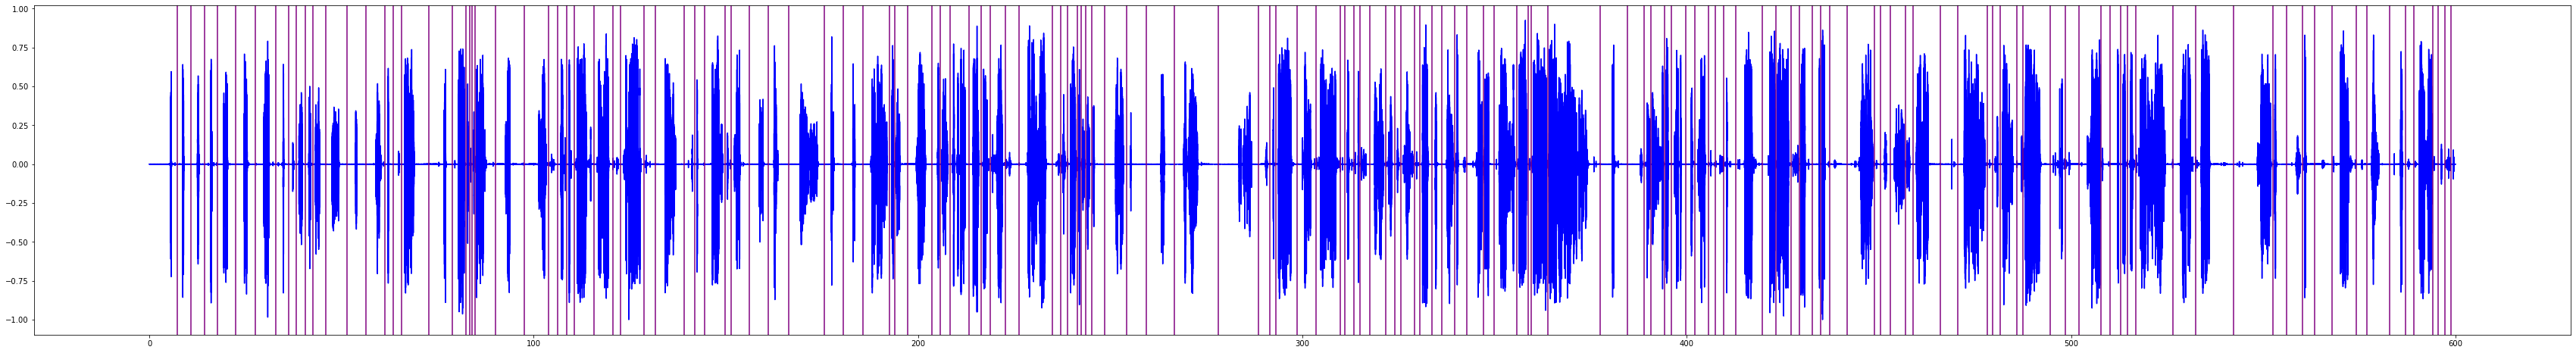

In [184]:
plt.figure(figsize=(60,8))
ax1 = plt.subplot(1,1,1)
ax1.plot(T, audio, color='blue');
for cut in cuts:
    ax1.axvline(x=cut/C.sample_rate, color='purple')
plt.show()

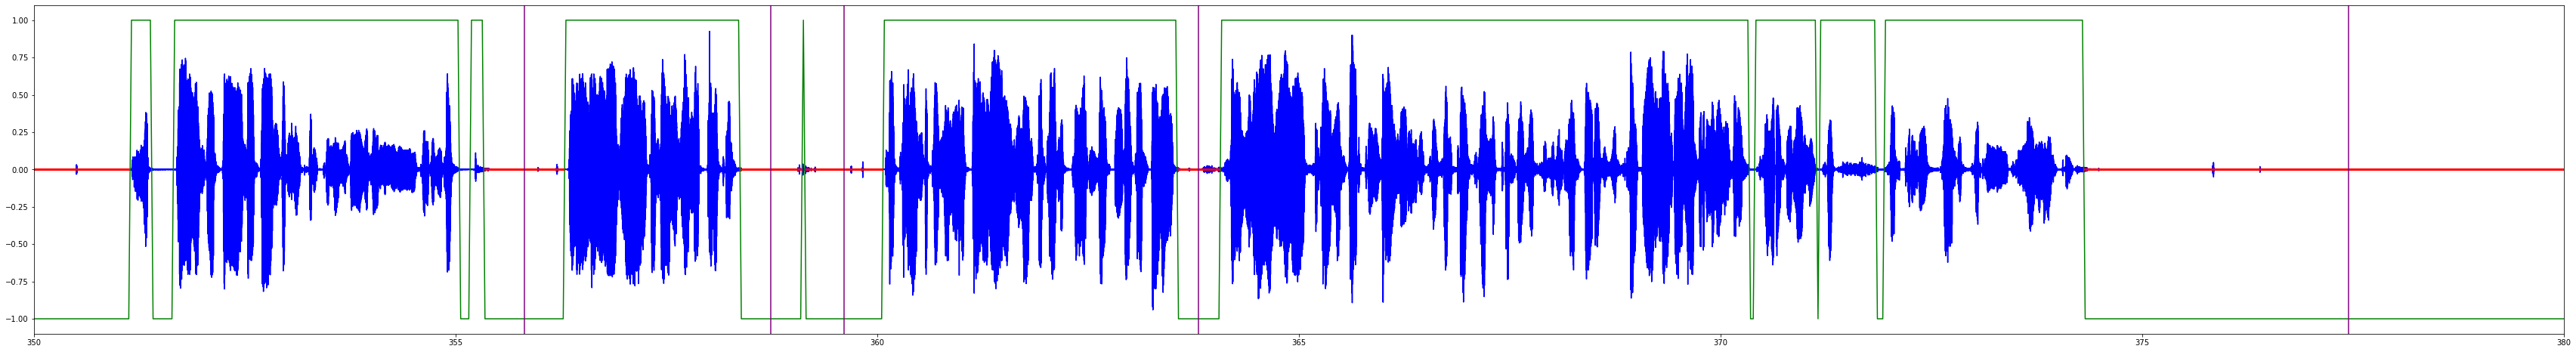

In [185]:
plt.figure(figsize=(60,8))
ax1 = plt.subplot(1,1,1)
ax1.plot(T, audio, color='blue');
ax1.plot(TSQ, 2*speech_q-1, color='green')
for (x,y) in pauses:
    ax1.plot([x,y], [0,0], color='red', linewidth=3)
for cut in cuts:
    ax1.axvline(x=cut/C.sample_rate, color='purple')
plt.xlim(350,380)
plt.show()

In [ ]:
plt.figure(figsize=(60,8))
ax1 = plt.subplot(2,1,1)
ax1.plot(T, audio, color='blue');
ax1.plot(TSQ, 2*speech_q-1, color='green')
for (x,y) in silences:
    if y-x > 0.2:
        ax1.plot([x,y], [0,0], color='red', linewidth=3)
ax2 = plt.subplot(2,1,2)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=C.sample_rate, fmax=8000);
ax2.sharex(ax1)
plt.xlim(510,530)
plt.show()

In [133]:
silences

array([[  5.50381596,   5.79180633],
       [  8.60771217,   9.02369826],
       [ 12.4795827 ,  12.99156558],
       [ 15.87146928,  16.3194543 ],
       [ 19.29535479,  19.45534944],
       [ 19.5193473 ,  19.64734302],
       [ 19.80733767,  20.38331841],
       [ 24.60717717,  25.53514614],
       [ 29.72700597,  31.23095568],
       [ 34.75083798,  35.03882835],
       [ 37.27875345,  37.50274596],
       [ 37.63074168,  37.66274061],
       [ 38.87869995,  39.77466999],
       [ 41.47061328,  41.98259616],
       [ 43.1985555 ,  43.8385341 ],
       [ 43.90253196,  44.31851805],
       [ 47.48641212,  48.99036183],
       [ 49.15035648,  49.40634792],
       [ 53.63020668,  53.98219491],
       [ 58.91003013,  60.09399054],
       [ 60.25398519,  60.34998198],
       [ 62.01392634,  62.26991778],
       [ 64.79783325,  64.92582897],
       [ 66.36578082,  67.90172946],
       [ 67.96572732,  68.92569522],
       [ 76.66943628,  77.14942023],
       [ 80.34931323,  82.07725545],
 